In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("credit_record.csv")

In [3]:
data2 = pd.read_csv("application_record.csv")

In [4]:
data.shape

(1048575, 3)

In [5]:
final_data = data.merge(data2, on="ID")

In [6]:
final_data.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0


In [7]:
final_data.loc[final_data["OCCUPATION_TYPE"].notnull(), "OCCUPATION_TYPE"]

,OCCUPATION_TYPE
31,Security staff
32,Security staff
33,Security staff
34,Security staff
35,Security staff
...,...
777710,Drivers
777711,Drivers
777712,Drivers
777713,Drivers


In [8]:
#Handling Null values

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
final_data.loc[final_data["OCCUPATION_TYPE"].notnull(), "OCCUPATION_TYPE"] = \
enc.fit_transform(final_data.loc[final_data["OCCUPATION_TYPE"].notnull(), "OCCUPATION_TYPE"])

In [10]:
X = final_data.drop("OCCUPATION_TYPE", axis=1)
X = X.select_dtypes(['int', 'float'])

In [11]:
X.drop(["FLAG_MOBIL"], axis=1, inplace=True)

In [12]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss = []
for i in range(2,10):
    model = KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)
wcss

[9140022063661128.0,
 5211826684150724.0,
 3823160025228230.0,
 3533461930380088.5,
 2573409328690601.0,
 2172741550104709.5,
 1898740200430521.8,
 1835132656697076.0]

<Axes: >

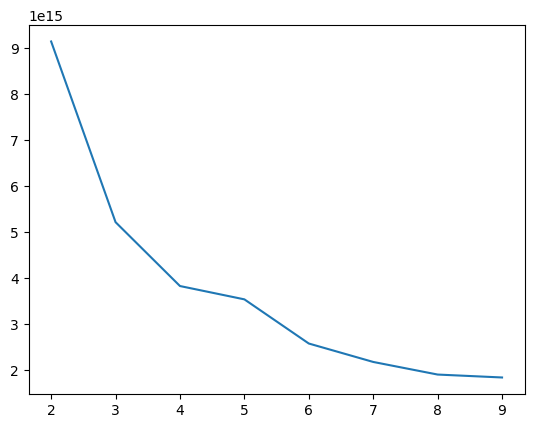

In [13]:
import seaborn as sns
sns.lineplot(x=range(2,10),y=wcss)

In [14]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [15]:
final_data["Labels"] = model.labels_

In [16]:
data0 = final_data.loc[final_data["Labels"]==0].select_dtypes(["int", "float"])
data0["OCCUPATION_TYPE"] = final_data.loc[final_data["Labels"]==0, "OCCUPATION_TYPE"]

In [17]:
data1 = final_data.loc[final_data["Labels"]==1].select_dtypes(["int", "float"])
data1["OCCUPATION_TYPE"] = final_data.loc[final_data["Labels"]==1, "OCCUPATION_TYPE"]

In [18]:
data2 = final_data.loc[final_data["Labels"]==2].select_dtypes(["int", "float"])
data2["OCCUPATION_TYPE"] = final_data.loc[final_data["Labels"]==2, "OCCUPATION_TYPE"]

In [19]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=3)
data0 = imp.fit_transform(data0)

In [20]:
data1 = imp.fit_transform(data1)

In [21]:
data2 = imp.fit_transform(data2)

In [22]:
# Assuming 'OCCUPATION_TYPE' was the last column added to data0, data1, data2
final_data.loc[final_data["Labels"] == 0, "OCCUPATION_TYPE"] = data0[:, -1]
final_data.loc[final_data["Labels"] == 1, "OCCUPATION_TYPE"] = data1[:, -1]
final_data.loc[final_data["Labels"] == 2, "OCCUPATION_TYPE"] = data2[:, -1]

In [23]:
final_data.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0


In [41]:
final_data.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'Labels'],
      dtype='object')

In [24]:
#Checking for duplicates

In [25]:
duplicates = final_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [26]:
final_data.drop_duplicates(inplace=True)

In [27]:
duplicates_after_removal = final_data.duplicated().sum()
print(f"\nNumber of duplicate rows after removal: {duplicates_after_removal}")


Number of duplicate rows after removal: 0


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [29]:
numerical_cols = final_data.select_dtypes(include=['int64', 'float64']).columns

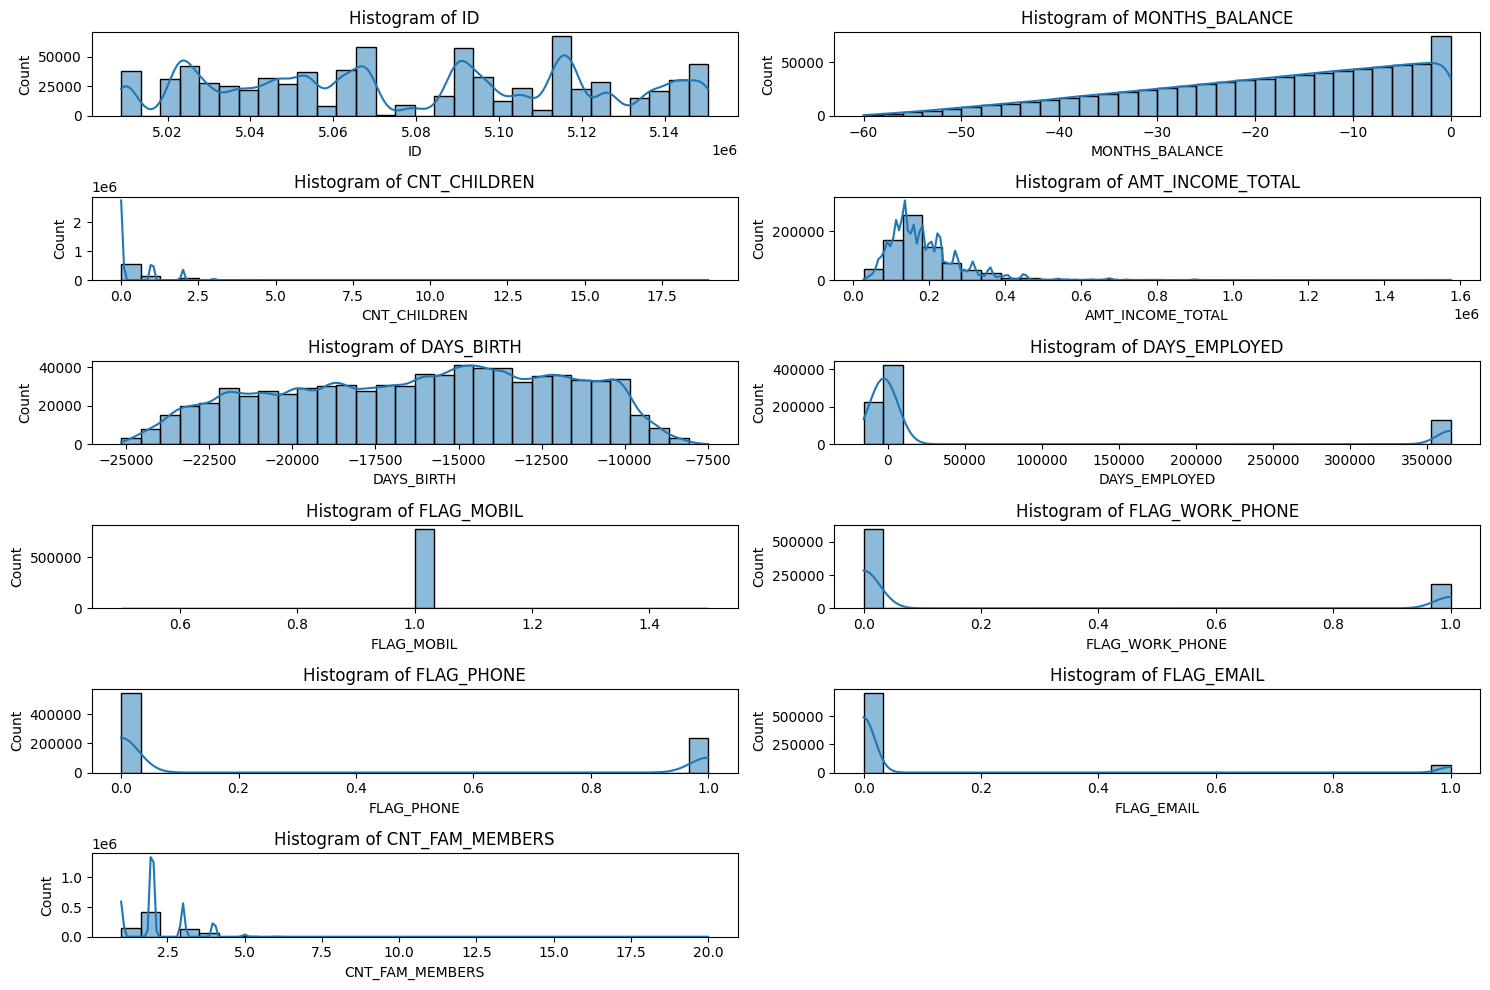

In [30]:
num_cols = len(numerical_cols)
num_rows = (num_cols + 1) // 2
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(final_data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [32]:
categorical_cols = final_data.select_dtypes(include=['object', 'category']).columns
filtered_cols = [col for col in categorical_cols if final_data[col].nunique() < 20]
print("Filtered Categorical Columns:", filtered_cols)

Filtered Categorical Columns: ['STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']


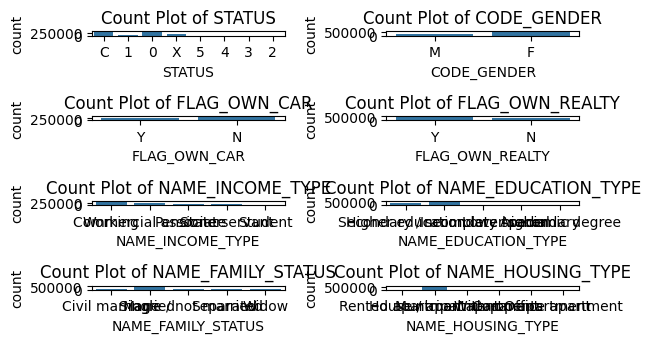

In [33]:
for i, column in enumerate(filtered_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=final_data, x=column)
    plt.title(f'Count Plot of {column}')
plt.tight_layout()
plt.show()

In [34]:
final_data.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'Labels'],
      dtype='object')

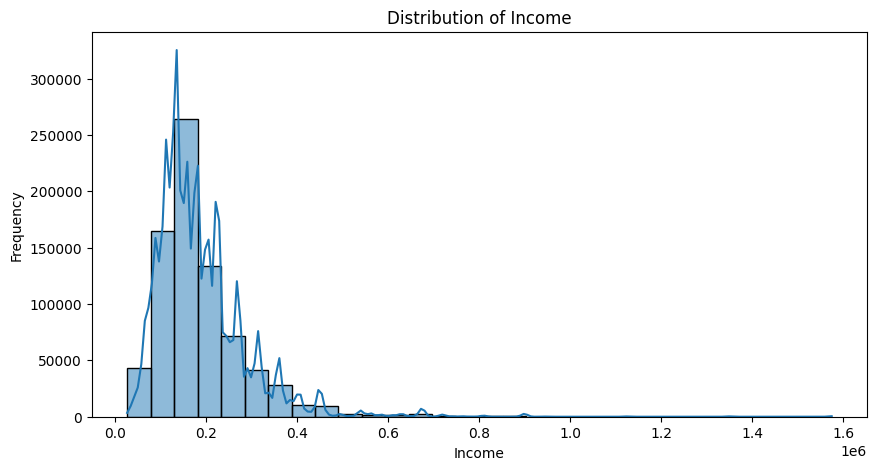

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of AMT_INCOME_TOTAL
plt.figure(figsize=(10, 5))
sns.histplot(data=final_data, x='AMT_INCOME_TOTAL', kde=True, bins=30)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


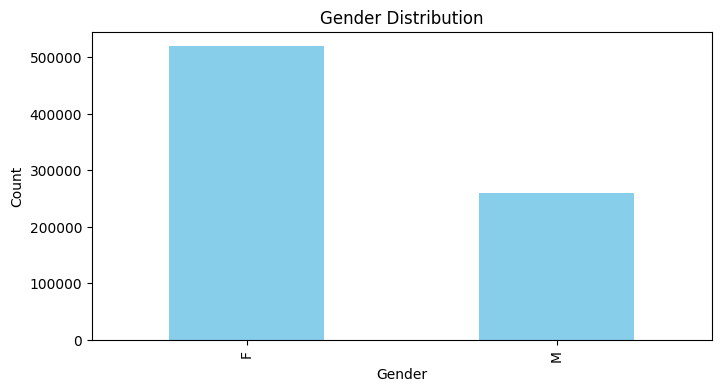

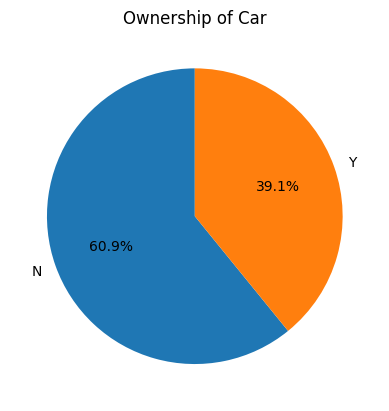

In [38]:
# Example: Bar plot for CODE_GENDER_M
plt.figure(figsize=(8, 4))
final_data['CODE_GENDER'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Example: Pie chart for FLAG_OWN_CAR_Y
final_data['FLAG_OWN_CAR'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Ownership of Car")
plt.ylabel("")
plt.show()


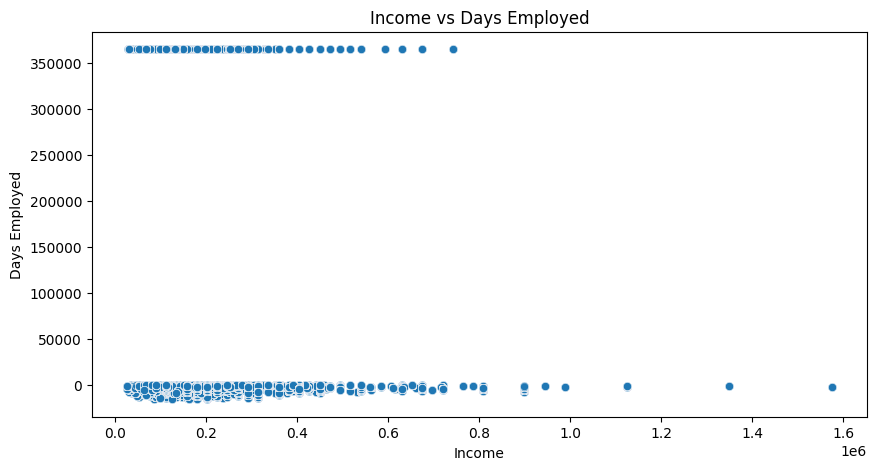

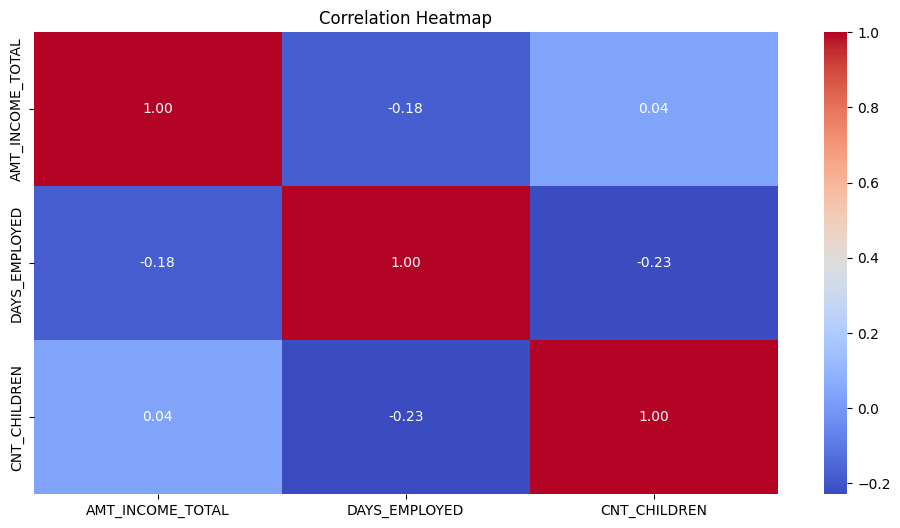

In [39]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=final_data, x='AMT_INCOME_TOTAL', y='DAYS_EMPLOYED', alpha=0.7)
plt.title("Income vs Days Employed")
plt.xlabel("Income")
plt.ylabel("Days Employed")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
corr = final_data[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'CNT_CHILDREN']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [45]:
# Handling Outliers

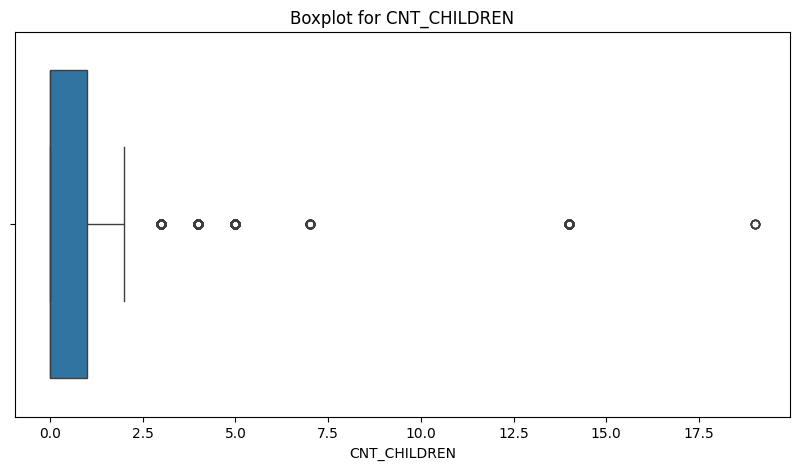

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=final_data, x="CNT_CHILDREN")
plt.title("Boxplot for CNT_CHILDREN")
plt.show()


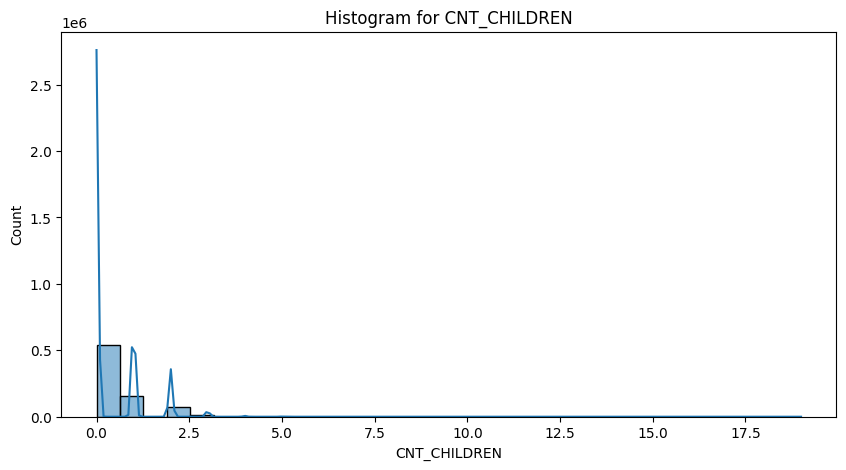

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(data=final_data, x="CNT_CHILDREN", kde=True, bins=30)
plt.title("Histogram for CNT_CHILDREN")
plt.show()


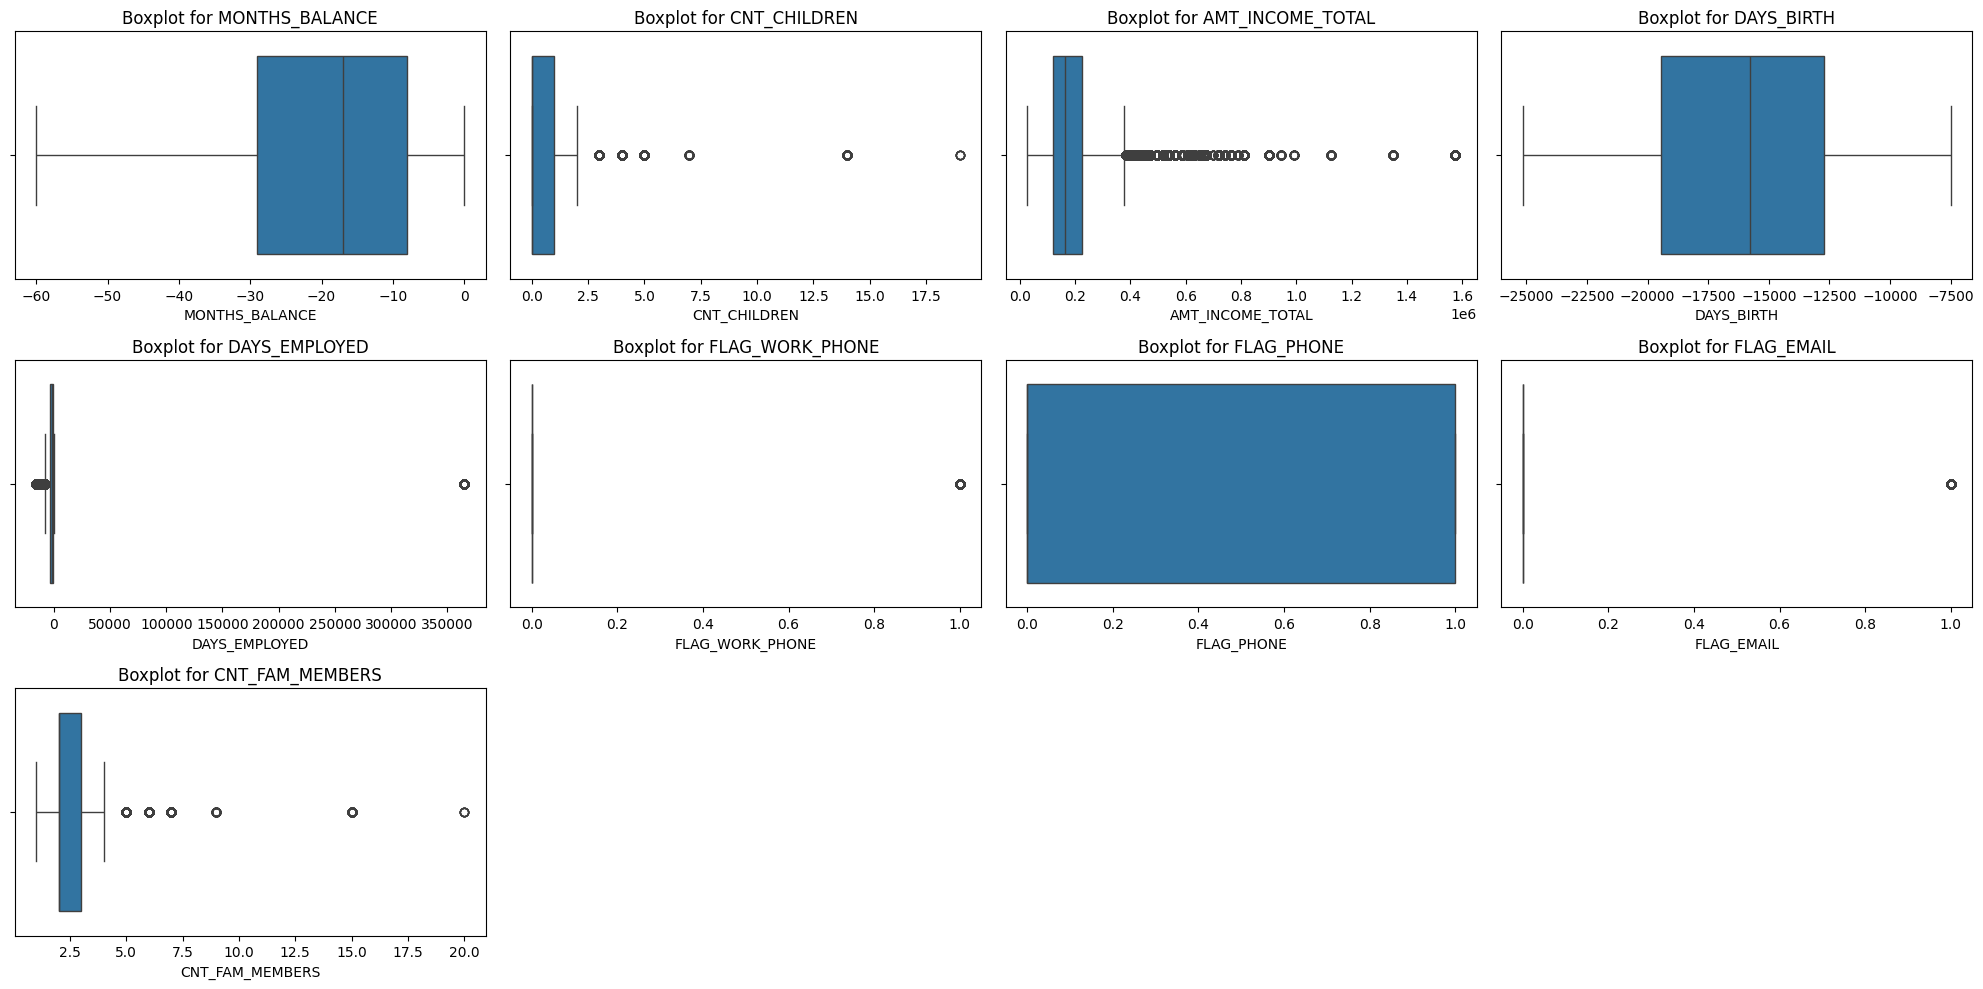

In [48]:
numerical_columns = [
    'MONTHS_BALANCE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
    'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'CNT_FAM_MEMBERS'
]

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=final_data, x=col)
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()


In [49]:
#Outlier Detection Using IQR Method The IQR method is effective for identifying outliers in numerical data.

In [50]:
for col in numerical_columns:
    Q1 = final_data[col].quantile(0.25)
    Q3 = final_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    final_data[col] = np.where(final_data[col] < lower_bound, lower_bound, final_data[col])
    final_data[col] = np.where(final_data[col] > upper_bound, upper_bound, final_data[col])


In [51]:
for col in numerical_columns:
    Q1 = final_data[col].quantile(0.25)
    Q3 = final_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    final_data = final_data[(final_data[col] >= lower_bound) & (final_data[col] <= upper_bound)]


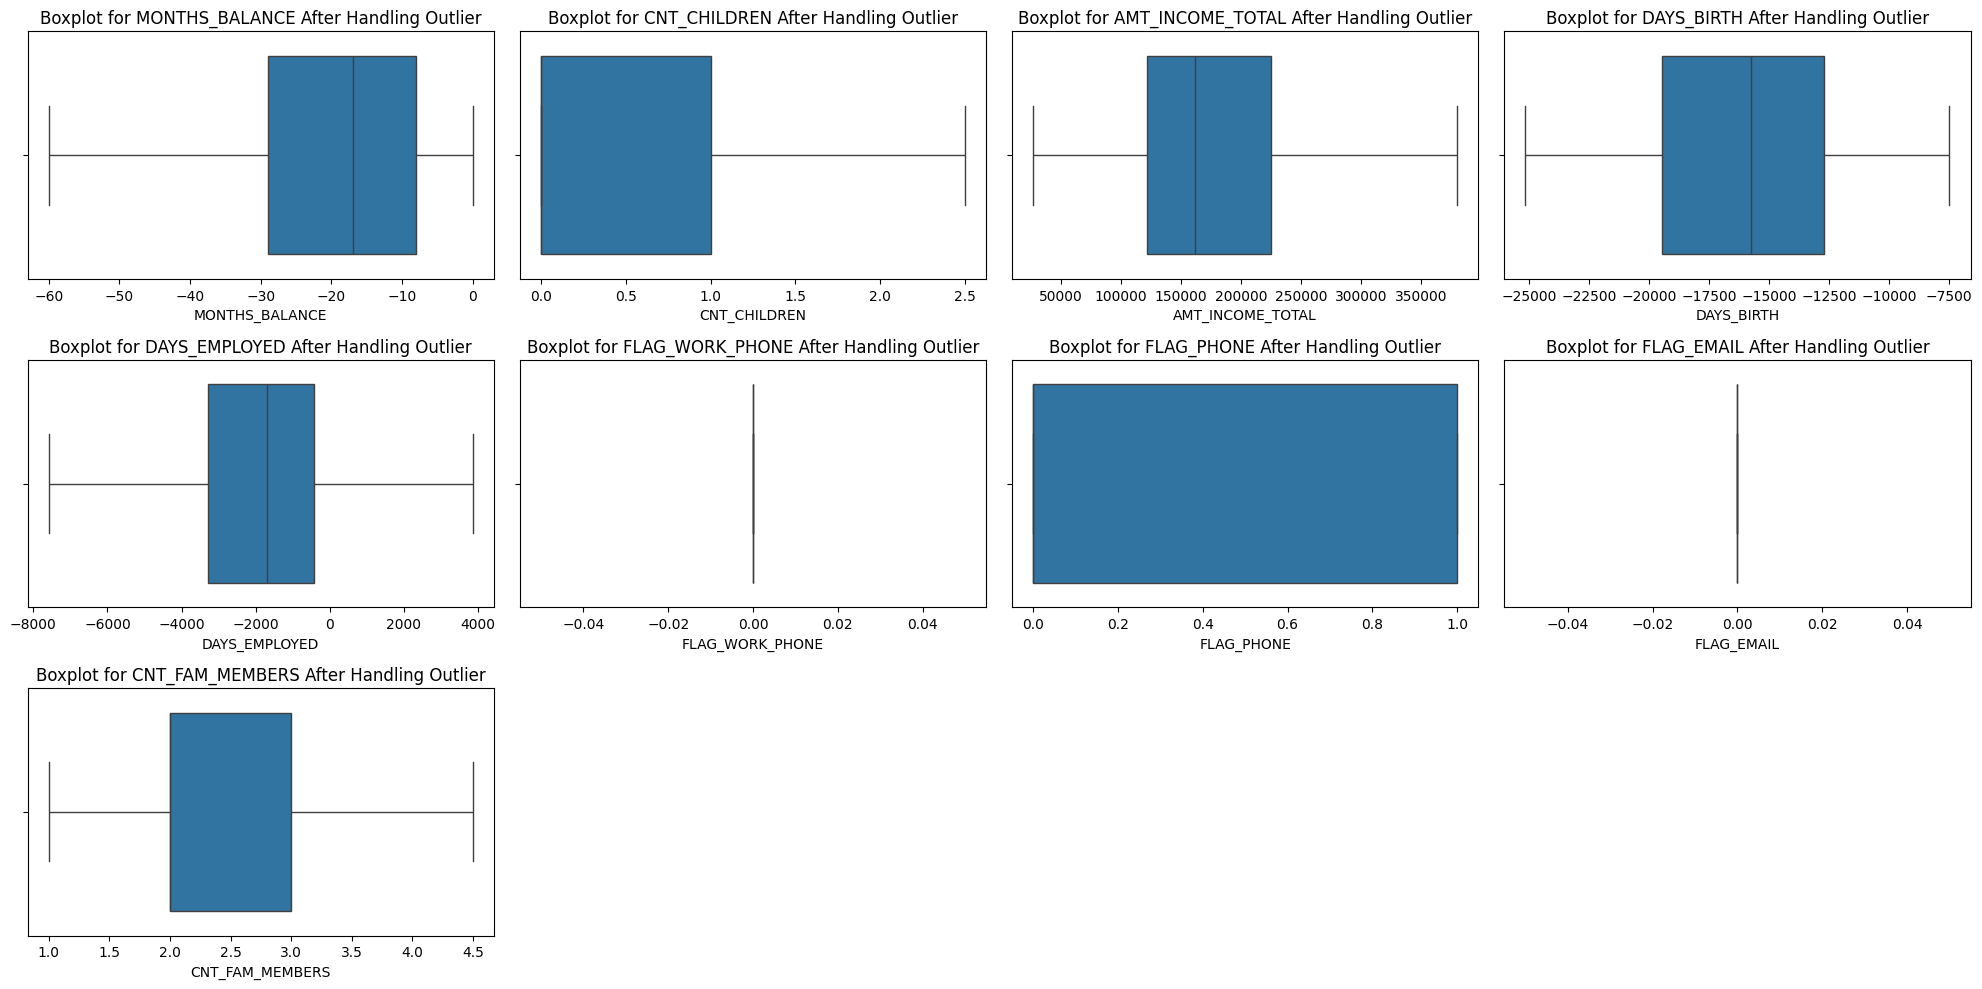

In [52]:
numerical_columns = [
    'MONTHS_BALANCE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
    'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'CNT_FAM_MEMBERS'
]

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=final_data, x=col)
    plt.title(f"Boxplot for {col} After Handling Outlier")
plt.tight_layout()
plt.show()


In [56]:
# Calculate correlation only for numeric features
correlation_matrix = final_data.select_dtypes(include=['number','int','float']).corr()


In [57]:
threshold = 0.1


In [58]:
target_correlation = correlation_matrix["Labels"].abs()
low_correlation_features = target_correlation[target_correlation < threshold].index
print("Low-correlated features:", low_correlation_features)


Low-correlated features: Index(['ID', 'MONTHS_BALANCE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS'], dtype='object')


In [59]:
final_data = final_data.drop(columns=low_correlation_features)
print("Remaining features:", final_data.columns)


Remaining features: Index(['STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'Labels'],
      dtype='object')


In [60]:
missing_values = final_data.isnull().sum()
print(missing_values[missing_values > 0])  # Only columns with missing values


Series([], dtype: int64)


In [61]:
duplicates = final_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 751746


In [64]:
final_data.drop_duplicates(inplace=True)

In [65]:
duplicates = final_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [66]:
print(final_data.dtypes)


STATUS                  object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL               int64
FLAG_WORK_PHONE        float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
Labels                   int32
dtype: object


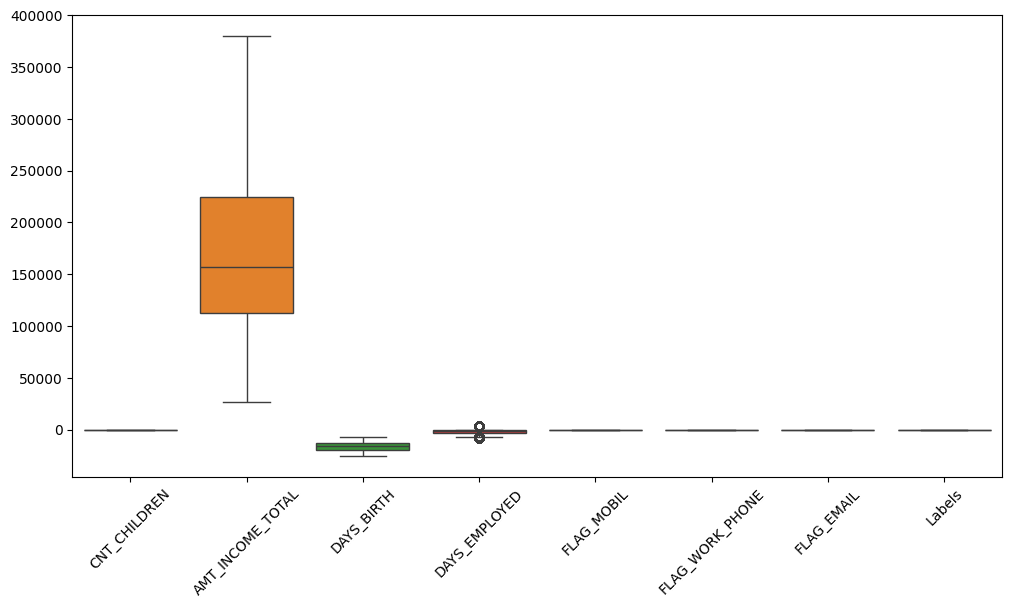

In [68]:

# Boxplot for numeric features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data.select_dtypes(['int', 'float']))
plt.xticks(rotation=45)
plt.show()


In [69]:
categorical_columns = final_data.select_dtypes(['object', 'category']).columns

for col in categorical_columns:
    print(f"{col} unique values:\n{final_data[col].unique()}\n")


STATUS unique values:
['C' '1' '0' 'X' '5' '4' '3' '2']

CODE_GENDER unique values:
['M' 'F']

FLAG_OWN_CAR unique values:
['Y' 'N']

FLAG_OWN_REALTY unique values:
['Y' 'N']

NAME_INCOME_TYPE unique values:
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']

NAME_EDUCATION_TYPE unique values:
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS unique values:
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']

NAME_HOUSING_TYPE unique values:
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']

OCCUPATION_TYPE unique values:
[10.0 16.0 14.0 1.0 0.0 8.0 4.0 3.0 6.0 12.0 2.0 4.666666666666667 9.0
 11.0 15.0 17.0 5.0 13.0 7.0 7.666666666666667 6.666666666666667
 10.333333333333334 1.3333333333333333 3.3333333333333335
 15.333333333333334 5.333333333333333]



In [70]:
final_data["AGE"] = final_data["DAYS_BIRTH"] / -365
print(final_data[final_data["AGE"] < 0])


Empty DataFrame
Columns: [STATUS, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, Labels, AGE]
Index: []


In [71]:
print(final_data.columns)


Index(['STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'Labels', 'AGE'],
      dtype='object')


In [72]:
final_data.to_csv('DataDominators_CreditCardFraud.csv', index=False)

In [73]:
from google.colab import files
files.download('DataDominators_CreditCardFraud.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>